# Data Cleaning Project
http://archive.ics.uci.edu/ml/datasets/heart+Disease
## Here I will attempt to clean the raw data from the Cleveland Heart Disease Data Set. It can be found at  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

### The data is space delimited and contains 76 attributes, of which we will only consider 14. They are as follows:

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute)

 The 75th attribute in the uncleaned data set is a patient name which has since been redacted for patient anonymity. I will use this 75th attribute which is always 'name' as a point at which to "cut" and begin a new patient row. There is some data past this semi-ordered name structure which is nonesensical and will not be used. For missing values, I will likely impute the median or mean, whichever makes more logical sense given the context of the attribute.

### Read in the data, store into a dataframe, and convert categorical variables

In [14]:
'''
List of available variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
'''



%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint


# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_table("Semi_Scrubbed.csv", sep=',', header=None, names=columns)


#We will now not impute missing values (?) to mean of column

df = df[df['ca'] != '?']
df = df[df['thal'] != '?']




In [8]:
df
#Data is cleaned and ready for analysis!

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Data Story Telling

## Can you count something interesting?

### With 14 variables to work with, there are many interesting things we can count. For example, we can count the numbers of people with varying degrees of disease. As is hoped and thankfully, there are less and less as heart disease gets progressively worse. See cell DST1

## Can you find some trends (high, low, increase, decrease, anomalies)?

## Can you make a bar plot or a histogram?

## Can you compare two related quantities?

## Can you make a scatterplot?

## Can you make a time-series plot?

### There is no time series data in this dataset, so no.  

In [9]:
#Generate Pandas Profile to get general sense of Data

import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,297
Total Missing (%),0.0%
Total size in memory,34.9 KiB
Average record size in memory,120.3 B
Numeric,13
Categorical,2
Date,0
Text (Unique),0
Rejected,0
Distinct count,41


## From this profile report we see that attributes 'ca' and 'thal' are read in a categorical, despite being easily converted to numeric. We will do this with the pd.to_numeric fxn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007F3A8E5C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000007F3F847940>]], dtype=object)

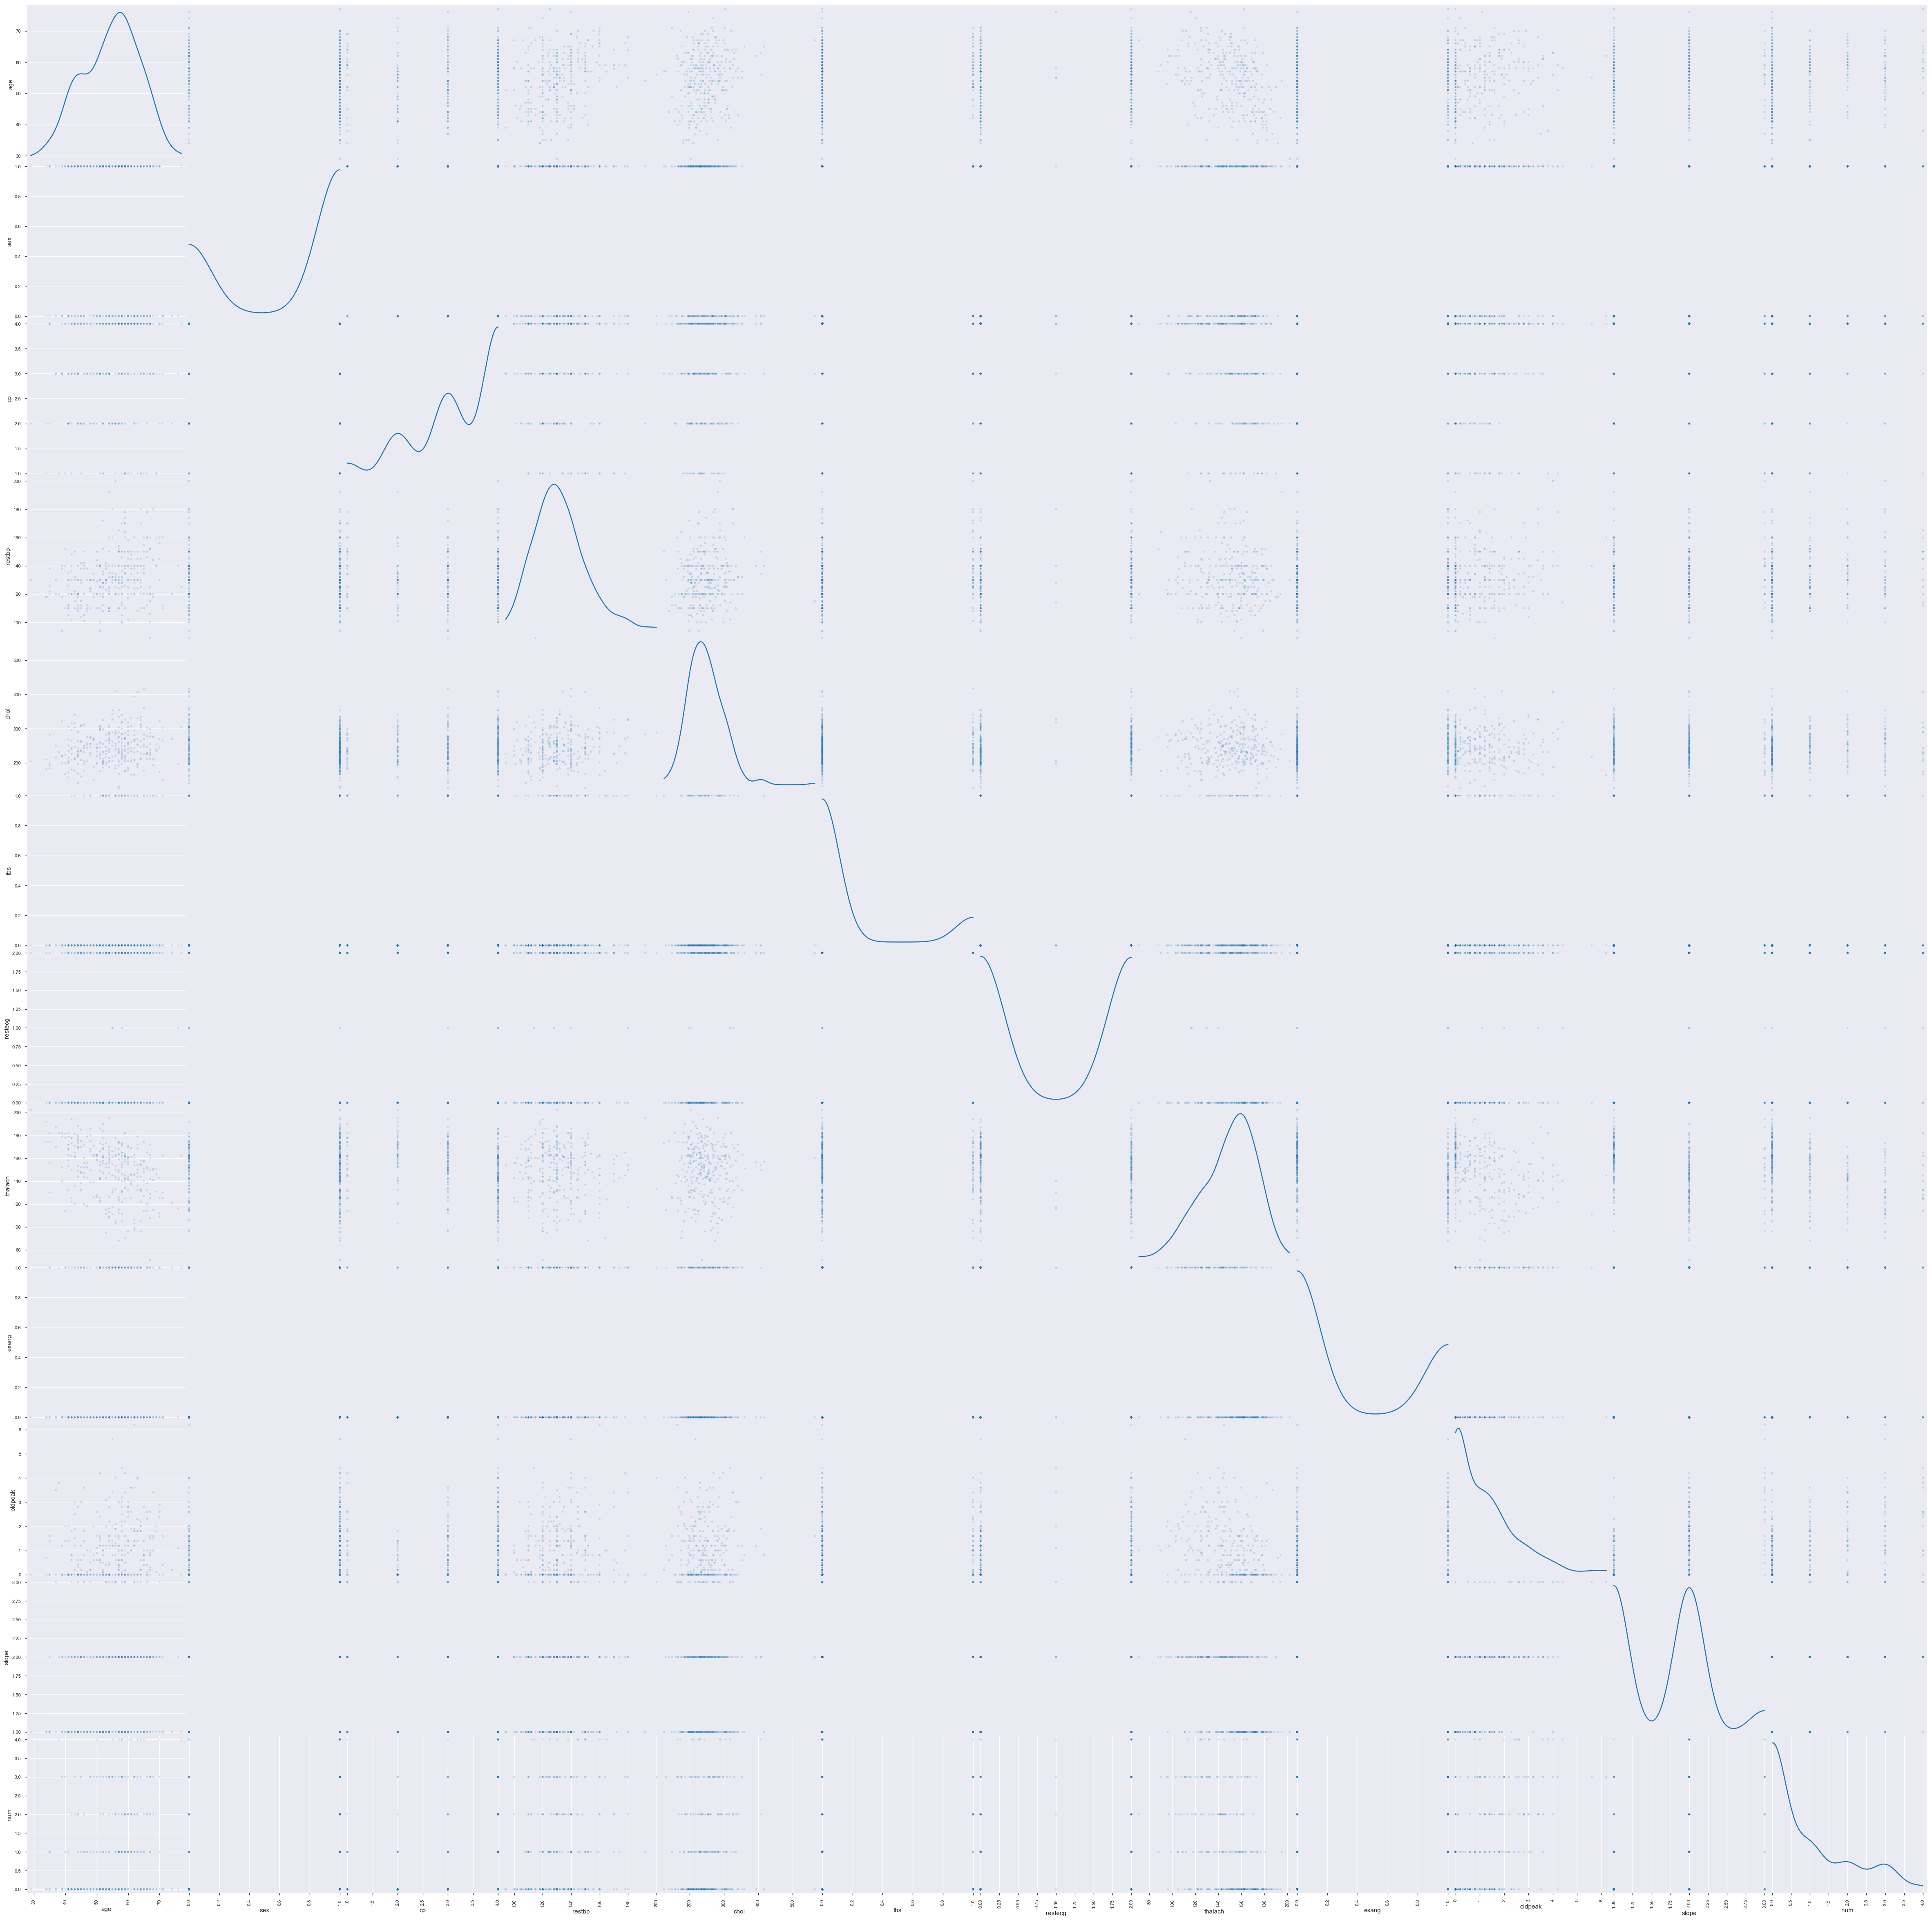

In [4]:
#Scatter matrix of all attributes vs all others. Diagonal gives kernel density estimation of that attrib instead of
#plotting uselessly vs itself

#needs some cleanup - increase size to massive?

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(60,60), diagonal='kde')

In [22]:
ca_num = pd.to_numeric(df['ca'])
thal_num = pd.to_numeric(df['thal'])

df.append(ca_num)
df.append(thal_num)

df

#WIP

C:\Users\Matt\Anaconda3\lib\site-packages\pandas\core\frame.py:4528: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  other.index).difference(self.columns).tolist()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


0    160
1     54
3     35
2     35
4     13
Name: num, dtype: int64


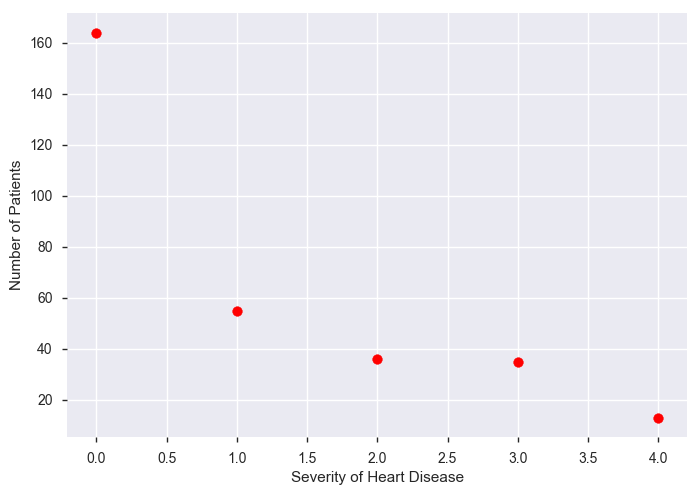

In [10]:
# Simple scatter showing number of patients with each severity of heart disease
print(df['num'].value_counts())
plt.scatter([0,1,2,3,4],[164,55,36,35,13],color='red')
plt.ylabel('Number of Patients')
plt.xlabel('Severity of Heart Disease')
plt.show()
